In [41]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from soliket import BinnedClusterLikelihood
from cobaya.model import get_model
import camb
from astropy.io import fits
from astropy import table
from astLib import astWCS
import math
from nemo import completeness, MockSurvey

import sys
sys.path.append('../')
import nemo_mocks
import imp
imp.reload(nemo_mocks)

<module 'nemo_mocks' from '/Users/user/SOLikeT/soliket/clusters/notebooks/../nemo_mocks.py'>

In [42]:
h = 0.68

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=100.*h, ombh2=0.049*h**2, omch2=(0.31-0.049)*h**2, mnu=0.0, omk=0, tau=0.055)
pars.InitPower.set_params(As=0.81**2/0.8104862**2*2.022662e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.], kmax=2.0)

#Linear spectra
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())
print(s8)

[0.81]


In [8]:
pwd

'/Users/user/SOLikeT/soliket/clusters/notebooks'

In [60]:
h = 0.68

params = {
    'h': 0.68,
    'n_s': 0.965,
    'Omega_b': 0.049,      
    'Omega_c': 0.26, 
    'sigma8': 0.81,
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'm_nu': 0.0,
    'C0': 2.

}

path2data ='/Users/user/SOLikeT/soliket/clusters/data/advact/DR5CosmoSims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'\
'NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': True,
    'data': {
        'data_path': path2data,
        'cat_file': "NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits",
        'Q_file': "selFn/QFit.fits",
        'tile_file': "selFn/tileAreas.txt",
        'rms_file': "selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200c',
        'md_ym': '200c'
        
    },
    'YM': {
        'Mpivot': 4.25e14 #*0.68
    },
    'selfunc': {
        'SNRcut': 5.,
        #'single_tile_test': "no",
        'mode': 'injection',
        'Qmode': 'downsample',
        'dwnsmpl_bins': 50,
        'save_dwsmpld': False,
        'average_Q': True
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 5e13, #*0.68,
            'Mmax': 1e16, #*0.68,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'soliket.clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200c'}}
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

[soliket.binnedclusterlikelihood] Number of redshift bins = 28.


Initializing clusters.py Binned Clusters
Initializing clusters.py Binned Clusters
Initializing clusters.py Binned Clusters
Initializing clusters.py Binned Clusters
Initializing clusters.py Binned Clusters
Initializing clusters.py Binned Clusters
Initializing clusters.py Binned Clusters
Initializing clusters.py Binned Clusters
Initializing clusters.py Binned Clusters
Running Q-fit completeness with downsampling selection function inputs.
Running Q-fit completeness with downsampling selection function inputs.
Running Q-fit completeness with downsampling selection function inputs.
Running Q-fit completeness with downsampling selection function inputs.
Running Q-fit completeness with downsampling selection function inputs.
Running Q-fit completeness with downsampling selection function inputs.
Running Q-fit completeness with downsampling selection function inputs.
Running Q-fit completeness with downsampling selection function inputs.
Running Q-fit completeness with downsampling selection 

 Total predicted 2D N = 3159.5264180402437
 Total predicted 2D N = 3159.5264180402437
 Total predicted 2D N = 3159.5264180402437
 Total predicted 2D N = 3159.5264180402437
 Total predicted 2D N = 3159.5264180402437
 Total predicted 2D N = 3159.5264180402437
 Total predicted 2D N = 3159.5264180402437
 Total predicted 2D N = 3159.5264180402437
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 1: 355.55637958369795.
Number of clusters in redshift bin 1: 355.55637958369795.
Number of clusters in redsh

Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clus

Number of clusters in snr bin 2: 192.65372226330737.
Number of clusters in snr bin 2: 192.65372226330737.
Number of clusters in snr bin 2: 192.65372226330737.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 4: 3.690288132954083.
Number of clusters in snr bin 4: 3.690288132954083.
Number of clusters in snr bin 4: 3.690288132954083.
Number of clusters in snr bin 4: 3.690288132954083.
Number of clusters in snr bin 4: 3.690288132954083.
Number of clusters in snr bin 4: 3.690288132954083.
Number of clusters in snr bin 4: 3.690288132954083.


 ::: 2D ln likelihood =  185.30914187983865


array([-185.30914188])

In [61]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [62]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[:,i].sum()    
    catNq[i] = catNzq[:,i].sum()

 Total predicted 2D N = 3159.5264180402437
 Total predicted 2D N = 3159.5264180402437
 Total predicted 2D N = 3159.5264180402437
 Total predicted 2D N = 3159.5264180402437
 Total predicted 2D N = 3159.5264180402437
 Total predicted 2D N = 3159.5264180402437
 Total predicted 2D N = 3159.5264180402437
 Total predicted 2D N = 3159.5264180402437
 Total predicted 2D N = 3159.5264180402437
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 0: 82.41112194969105.
Number of clusters in redshift bin 1: 355.55637958369795.
Number of clusters in redshift bin 1: 355.

Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 15: 9.456141263710114.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clusters in redshift bin 16: 6.176183449179629.
Number of clus

Number of clusters in snr bin 2: 192.65372226330737.
Number of clusters in snr bin 2: 192.65372226330737.
Number of clusters in snr bin 2: 192.65372226330737.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 3: 32.467558684454126.
Number of clusters in snr bin 4: 3.690288132954083.
Number of clusters in snr bin 4: 3.690288132954083.
Number of clusters in snr bin 4: 3.690288132954083.
Number of clusters in snr bin 4: 3.690288132954083.
Number of clusters in snr bin 4: 3.690288132954083.
Number of clusters in snr bin 4: 3.690288132954083.
Number of clusters in snr bin 4: 3.690288132954083.


In [63]:
Nz = np.zeros(len(z))
catNz = np.zeros(len(z))
for i in range(len(z)):
    Nz[i] = Nzq[i, :].sum()    
    catNz[i] = catNzq[i, :].sum()

In [64]:
bin_params = info['likelihood']['soliket.BinnedClusterLikelihood']['binning']


zbins = np.arange(bin_params['z']['zmin'], bin_params['z']['zmax'] + bin_params['z']['dz'], \
                  bin_params['z']['dz'])

logqmin = bin_params['q']['log10qmin']
logqmax = bin_params['q']['log10qmax']
dlogq = bin_params['q']['dlog10q']

# TODO: I removed the bin where everything is larger than qmax - is this ok?
qbins = 10**np.arange(logqmin, logqmax+dlogq, dlogq)

In [27]:
mockconfig_pred = {
    'predSNRCut': 5,
    'path2truthcat': '/Users/user/SOLikeT/soliket/clusters/data/advact/DR5CosmoSims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_truthCatalog.fits',
    'path2noisemap': path2data+'selFn/stitched_RMSMap_Arnaud_M2e14_z0p4.fits',
    'path2selFn': path2data+'selFn',
    'path2Qfunc': path2data+'selFn/QFit.fits',
    'relativisticCorrection': False,
    'rhoType': 'critical',
    'massFunc': 'Tinker08',
    'delta': 200,
    'applyPoissonScatter': False,
    'predAreaScale': 1.000, 
    'makeMock': True,
    'selFnZStep': 0.01,
    'method': 'injection',
    'QSource': 'injection'
}

In [28]:
predNz = nemo_mocks.get_nemo_pred(mockconfig_pred , zbins)

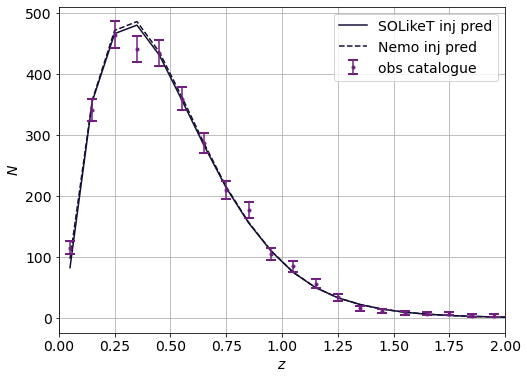

In [71]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[0], label='SOLikeT inj pred')
plt.plot(z, predNz, color=color_list[0], linestyle='--', label='Nemo inj pred')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xlim(0, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [69]:
predNz.sum()
#Nz.sum()

3204.8743062182716

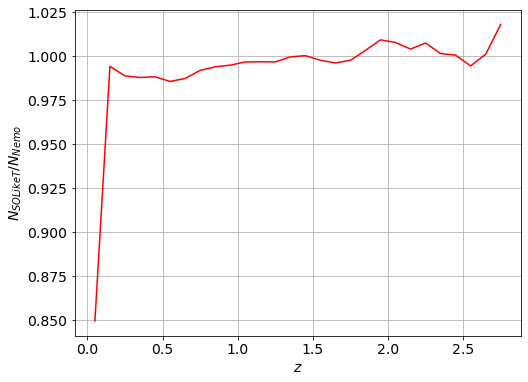

In [66]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz/predNz, 'r-')
# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N_{SOLikeT}/N_{Nemo}$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=14)
plt.grid()
plt.show()

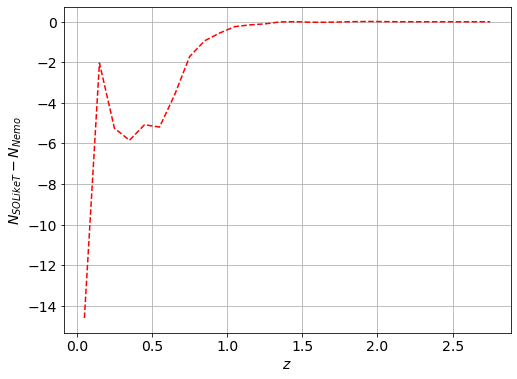

In [70]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz-predNz, 'r--')
# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N_{SOLikeT}-N_{Nemo}$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=14)
plt.grid()
plt.show()

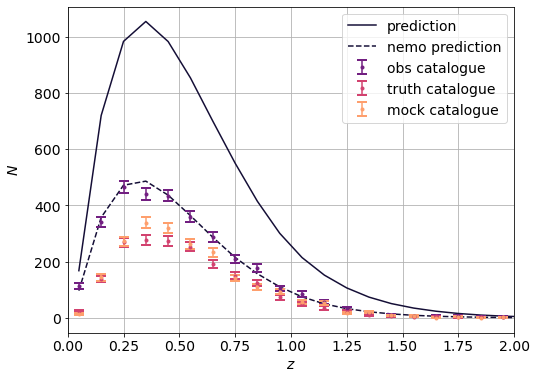

In [29]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[0], label='prediction')
plt.plot(z, predNz, color=color_list[0], linestyle='--', label='nemo prediction')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.errorbar(z, Nz_truth, yerr=np.sqrt(Nz_truth), color=color_list[8], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='truth catalogue')
plt.errorbar(z, Nz_mock, yerr=np.sqrt(Nz_mock), color=color_list[12], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='mock catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xlim(0, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


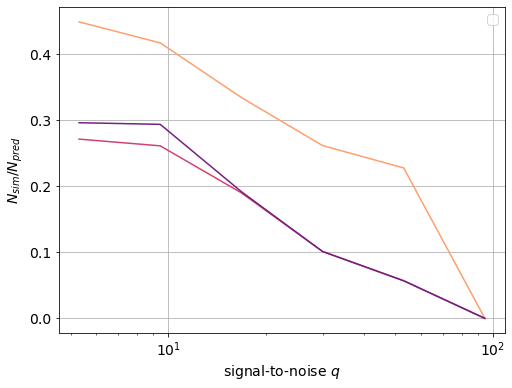

In [30]:
plt.figure(figsize=(8,6))
plt.semilogx(q, catNq/Nq, color=color_list[12])
plt.semilogx(q, Nq_truth/Nq, color=color_list[8])
plt.semilogx(q, Nq_mock/Nq, color=color_list[4])
# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N_{sim}/N_{pred}$', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


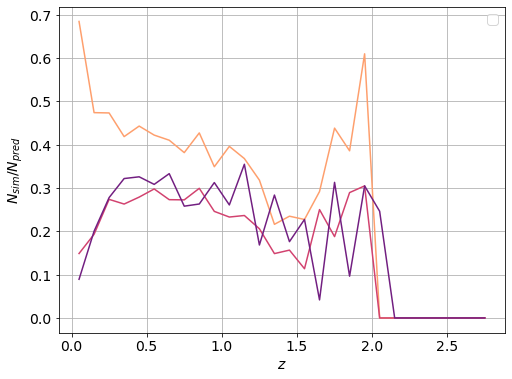

In [31]:
plt.figure(figsize=(8,6))
plt.plot(z, catNz/Nz, color=color_list[12])
plt.plot(z, Nz_truth/Nz, color=color_list[8])
plt.plot(z, Nz_mock/Nz, color=color_list[4])
# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N_{sim}/N_{pred}$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [ ]:
h = 0.68

params = {
    'h': 0.68,
    'n_s': 0.965,
    'Omega_b': 0.049,      
    'Omega_c': 0.26, 
    'sigma8': 0.81,
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'm_nu': 0.0,
    'C0': 2.

}

path2data ='../../../../../data/sims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'\
'NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': True,
    'data': {
        'data_path': path2data,
        'cat_file': "NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits",
        'Q_file': "selFn/QFit.fits",
        'tile_file': "selFn/tileAreas.txt",
        'rms_file': "selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200c',
        'md_ym': '200c'
        
    },
    'YM': {
        'Mpivot': 4.25e14*0.68
    },
    'selfunc': {
        'SNRcut': 7.,
        'single_tile_test': "no",
        'mode': 'injection',
        'Qmode': 'full',
        'dwnsmpl_bins': 50,
        'save_dwsmpld': False,
        'average_Q': True
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 5e13*0.68,
            'Mmax': 1e16*0.68,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'soliket.binned_clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200c'}}
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

In [ ]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [ ]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[:,i].sum()    
    catNq[i] = catNzq[:,i].sum()

In [ ]:
Nz = np.zeros(len(z))
catNz = np.zeros(len(z))
for i in range(len(z)):
    Nz[i] = Nzq[i, :].sum()    
    catNz[i] = catNzq[i, :].sum()

In [ ]:
bin_params = info['likelihood']['soliket.BinnedClusterLikelihood']['binning']


zbins = np.arange(bin_params['z']['zmin'], bin_params['z']['zmax'] + bin_params['z']['dz'], \
                  bin_params['z']['dz'])

logqmin = bin_params['q']['log10qmin']
logqmax = bin_params['q']['log10qmax']
dlogq = bin_params['q']['dlog10q']

# TODO: I removed the bin where everything is larger than qmax - is this ok?
qbins = 10**np.arange(logqmin, logqmax+dlogq, dlogq)

In [ ]:
mockconfig = {
    'predSNRCut': 7,
    'path2truthcat': '../../../../../data/sims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_truthCatalog.fits',
    'path2noisemap': path2data+'selFn/stitched_RMSMap_Arnaud_M2e14_z0p4.fits',
    'path2selFn': path2data+'selFn',
    'path2Qfunc': path2data+'selFn/QFit.fits',
    'relativisticCorrection': False,
    'rhoType': 'critical',
    'massFunc': 'Tinker08',
    'delta': 200,
    'applyPoissonScatter': False,
    'predAreaScale': 1.000, 
    'makeMock': True,
    'selFnZStep': 0.01,
    'method': 'fast',
    'QSource': 'fit'
}

In [ ]:
# Make a 'true' mock - use the truth catalog, get true_SNR by looking up noise in the selFn dir
mode = 'without_Q'
truthTab = nemo_mocks.make_truth_mock(mode, mockconfig)

In [ ]:
truth_cat, zarr, qarr = nemo_mocks.bin_catalog(truthTab[truthTab['true_SNR']>7], zbins, qbins, SNR_tag='true_SNR')

In [ ]:
mockTab = nemo_mocks.make_nemo_mock(mockconfig)

In [ ]:
mock_cat, zarr, qarr = nemo_mocks.bin_catalog(mockTab[mockTab['fixed_SNR']>7], zbins, qbins, SNR_tag='fixed_SNR')

In [ ]:
Nq_truth = np.zeros(len(q))

for i in range(len(q)):
    Nq_truth[i] = truth_cat[:,i].sum()    

In [ ]:
Nz_truth = np.zeros(len(z))

for i in range(len(z)):
    Nz_truth[i] = truth_cat[i,:].sum() 

In [ ]:
Nq_mock = np.zeros(len(q))

for i in range(len(q)):
    Nq_mock[i] = mock_cat[:,i].sum()    

In [ ]:
Nz_mock = np.zeros(len(z))

for i in range(len(z)):
    Nz_mock[i] = mock_cat[i,:].sum() 

In [ ]:
color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[0], label='prediction')
plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.errorbar(q, Nq_truth, yerr=np.sqrt(Nq_truth), color=color_list[8], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='truth catalogue')
plt.errorbar(q, Nq_mock, yerr=np.sqrt(Nq_mock), color=color_list[12], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [ ]:
mockconfig_pred = {
    'predSNRCut': 7,
    'path2truthcat': '../../../../../data/sims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_truthCatalog.fits',
    'path2noisemap': path2data+'selFn/stitched_RMSMap_Arnaud_M2e14_z0p4.fits',
    'path2selFn': path2data+'selFn',
    'path2Qfunc': path2data+'selFn/QFit.fits',
    'relativisticCorrection': False,
    'rhoType': 'critical',
    'massFunc': 'Tinker08',
    'delta': 200,
    'applyPoissonScatter': False,
    'predAreaScale': 1.000, 
    'makeMock': True,
    'selFnZStep': 0.01,
    'method': 'injection',
    'QSource': 'injection'
}

In [ ]:
predNz = nemo_mocks.get_nemo_pred(mockconfig_pred, zbins)

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[0], label='prediction')
plt.plot(z, predNz, color=color_list[0], linestyle='--', label='nemo prediction')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.errorbar(z, Nz_truth, yerr=np.sqrt(Nz_truth), color=color_list[8], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='truth catalogue')
plt.errorbar(z, Nz_mock, yerr=np.sqrt(Nz_mock), color=color_list[12], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='mock catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xlim(0, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.semilogx(q, catNq/Nq, color=color_list[12])
plt.semilogx(q, Nq_truth/Nq, color=color_list[8])
plt.semilogx(q, Nq_mock/Nq, color=color_list[4])
# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N_{sim}/N_{pred}$', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(z, catNz/Nz, color=color_list[12])
plt.plot(z, Nz_truth/Nz, color=color_list[8])
plt.plot(z, Nz_mock/Nz, color=color_list[4])
# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N_{sim}/N_{pred}$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()